# [NML23] Assignment 1B: Network Models

TAs: [Ortal Senouf](https://people.epfl.ch/ortal.senouf) and [William Cappelletti](https://people.epfl.ch/william.cappelletti)

## Students

* Team: `<3>`
* Students: `<Ahmed Nour Achiche>` (for the indivudual submission) or `<Mohamed Aziz Ben Chaabene>` (for the team submission)

## Rules

> ⚠️ **Read carefully before starting**

**Deadline:** March 28th

**Grading:**
* The integrality of Assignment 1 will be scaled to 100% and will amount to 25% of the overall assignments score.
* The total number of points for part B is **52**, the points for each exercise are stated in the instructions.
* All team members will receive the same grade based on the team solution.
* Collaboration between team members is encouraged. No collaboration between teams is allowed.

**Expected output:**

You will have coding and theoretical questions. Coding exercises shall be solved within the specified space:
```python
# Your solution here ###########################################################
...
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
```
Anything outside shall not be touched, except if otherwise stated.

Theoretical questions shall be answered in the following markdown cell. The first line will be 
> **Your answer here:**

**Submission:**
* Your submission is self-contained in the `.ipynb` file.

* Code has to be clean and readable. Provide meaningful variable names and comment where needed.

* Textual answers in [markdown cells][md_cells] shall be short: one to two
  sentences. Math shall be written in [LaTeX][md_latex].
    **NOTE**: handwritten notes pasted in the notebook are ignored

* You cannot import any other library than we imported.
  Note that Networkx is imported in the second section and cannot be used in the first except for the Question 4 of Section 1 (at the indicated portion only).

* Make sure all cells are executed before submitting. I.e., if you open the notebook again it should show numerical results and plots. Cells not run are ignored.

* Execute your notebook from a blank state before submission, to make sure it is reproducible. You can click "Kernel" then "Restart Kernel and Run All Cells" in Jupyter. We might re-run cells to ensure that the code is working and corresponds to the results.

[md_cells]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
[md_latex]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations

## Objective

The purpose of this assignment is to explore a given dataset, represent it by network by constructing different graphs. In the first section, you analyzed various network properties. In this second section, you will explore various network models and find out the network model fitting the ones you construct from the dataset.

In [2]:
'''!pip install networkx==3.0 -q
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ze-vDx_cMr7iNkivv8LLhniEtp4RD1ug' -O data_1b.pickle'''

"!pip install networkx==3.0 -q\n!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ze-vDx_cMr7iNkivv8LLhniEtp4RD1ug' -O data_1b.pickle"

In [1]:
import os
import urllib.request


# Install networkx 3.0
os.system('pip install networkx==3.0 -q')

# Download data_1b.pickle from Google Drive
url = 'https://docs.google.com/uc?export=download&id=1Ze-vDx_cMr7iNkivv8LLhniEtp4RD1ug'
filename = 'data_1b.pickle'
if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)



In [2]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

with open("data_1b.pickle", "rb") as f:
    data_1b = pickle.load(f)
f.close()
A_citation = data_1b['cit_graph']
A_feature_pruned = data_1b['feat_graph']

## Section B: Network Models

In this section, you will analyze the feature and citation graphs you constructed in the previous section in terms of the network model types.
For this purpose, you can use the NetworkX libary imported below. **Notice** that the citation and features adjency matrices were given to you in the previous code block.  

In [3]:
import networkx as nx

The next cell creates NetworkX graph objects from the adjacency matrices computed in the previous section. 

In [4]:
G_citation = nx.from_numpy_array(A_citation)
print('Number of nodes: {}, Number of edges: {}'. format(G_citation.number_of_nodes(), G_citation.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(nx.number_of_selfloops(G_citation), nx.number_connected_components(G_citation)))

Number of nodes: 418, Number of edges: 827
Number of self-loops: 0, Number of connected components: 16


In the rest of this assignment, we will consider the pruned feature graph as the feature network.

In [5]:
G_feature = nx.from_numpy_array(A_feature_pruned)
print('Number of nodes: {}, Number of edges: {}'. format(G_feature.number_of_nodes(), G_feature.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(nx.number_of_selfloops(G_feature), nx.number_connected_components(G_feature)))

Number of nodes: 418, Number of edges: 2364
Number of self-loops: 0, Number of connected components: 324


### Question 5 [8pt]: Simulation with the Erdős–Rényi (ER) random model

Create an ER graph using NetworkX to simulate the citation graph and the feature graph you have. When choosing parameters for the networks, take into account the number of vertices and edges of the original networks.

The number of nodes should exactly match the number of nodes in the original citation and feature graphs.

In [6]:
assert len(G_citation.nodes()) == len(G_feature.nodes())
n = len(G_citation.nodes())
n

418

We pick the number of links as the average of the number of edges in the citation and the feature graph.

In [7]:
m = np.round((G_citation.size() + G_feature.size()) / 2)
m

1596.0

**5.1 [2pt]** Explain how to determine the probability parameter for the Erdős–Rényi graph and crate a sample graph with NetworkX

**Your answer here:** 

The probability parameter p for an Erdős–Rényi graph with n nodes and m edges is computed as follows:

$$p = \frac{2m}{n(n-1)}$$

This equation is derived from the fact that an Erdős–Rényi graph with n nodes and m edges is created by randomly adding m edges to n nodes, with the chance of an edge being added equal to p.

In [8]:
# Your solution here ###########################################################
p = m / (n * (n - 1) / 2)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
G_er = nx.erdos_renyi_graph(n, p)

Check the number of edges in the Erdős–Rényi graph.

In [9]:
print('My Erdos-Rényi network that simulates the citation graph has {} edges.'.format(G_er.size()))

My Erdos-Rényi network that simulates the citation graph has 1684 edges.


**5.2 [2pt]** Check the size of the largest connected component in the citation, feature, and Erdős–Rényi graphs.

In [10]:
# Check the size of the largest connected component in the citation, feature, and Erdős–Rényi graphs


citation_components = list(nx.connected_components(G_citation))
giant_citation = G_citation.subgraph(max(citation_components, key=len))

feature_components = list(nx.connected_components(G_feature))
giant_feature = G_feature.subgraph(max(feature_components, key=len))

er_components = list(nx.connected_components(G_er))
giant_er = G_er.subgraph(max(er_components, key=len))

print('The giant component of the citation graph has {} nodes and {} edges.'.format(giant_citation.number_of_nodes(), giant_citation.size()))
print('The giant component of the Erdős-Rényi network has {} nodes and {} edges.'.format(giant_er.number_of_nodes(), giant_er.size()))
print('The giant component of the feature graph has {} nodes and {} edges.'.format(giant_feature.number_of_nodes(), giant_feature.size()))


The giant component of the citation graph has 395 nodes and 818 edges.
The giant component of the Erdős-Rényi network has 418 nodes and 1684 edges.
The giant component of the feature graph has 82 nodes and 2351 edges.


**5.3 [2pt]** Simulate a new Erdős–Rényi network to match the number of nodes in the giant component of the feature graph.
Explain how to choose the probability parameter in this setting.

*Hint:* Recall the expected giant component size from the lectures.

**Your answer here:**  from the course slides we know that 

$$ S = 1 - e^{-(N - 1) p_{new} S} $$

where 'S' is the relative size of the giant component in the feature graph i.e the number of nodes in the giant component of the feature graph divided by the number of nodes in the feature graph, and 'N' is the total number of nodes in the feature graph. $p_{new}$ is the probability of a new edge being added.

Therefore, we can solve for $p_{new}$ as follows:

$$ p_{new} = \frac{1}{S (N - 1)} \ln \left( \frac{1}{1 - S} \right) $$

In [11]:
# Your solution here ###########################################################
S = len(giant_citation.nodes()) / n
p_new = np.log( 1 / (1 - S) ) / (S * (n - 1))
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

G_er_new = nx.erdos_renyi_graph(n, p_new)

Check the size of the new Erdős–Rényi network and its giant component.

In [12]:
print('My new Erdos Renyi network that simulates the feature graph has {} edges.'.format(G_er_new.size()))
giant_er_new = G_er_new.subgraph(max(nx.connected_components(G_er_new), key=len)) # Your code here.
print('The giant component of the new Erdos-Rényi network has {} nodes and {} edges.'.format(giant_er_new.number_of_nodes(), giant_er_new.size()))

My new Erdos Renyi network that simulates the feature graph has 627 edges.
The giant component of the new Erdos-Rényi network has 393 nodes and 623 edges.


In [13]:
# Calculate the size and density of the giant components
GC_density_feature = nx.density(giant_feature)
GC_density_er_new = nx.density(giant_er_new)

# Calculate the size and density of the overall graphs
overall_density_feature = nx.density(G_feature)
overall_density_er_new = nx.density(G_er_new)

# Compare the densities
print('Density of the giant component in the feature graph:', GC_density_feature)
print('Density of the giant component in the new ER network:', GC_density_er_new)
print('Density of the overall feature graph:', overall_density_feature)
print('Density of the overall new ER network:', overall_density_er_new)


Density of the giant component in the feature graph: 0.7079193014152364
Density of the giant component in the new ER network: 0.008087968011632134
Density of the overall feature graph: 0.027124711713882484
Density of the overall new ER network: 0.007194244604316547


**5.4 [2 pt]** Is the new ER graph a good fit for the feature graph? Explain in terms of the size and density of the GC and overall graph. Remember that the feature graph in this section is a pruned version of the original dense graph.
 

**Your answer here:** TO BE COMPLETED

### Question 6 [8pt]: Degree Distributions and configuration models

**6.1 [1pt]** Extract with NetworkX the degree distribution of the citation and the feature graph.

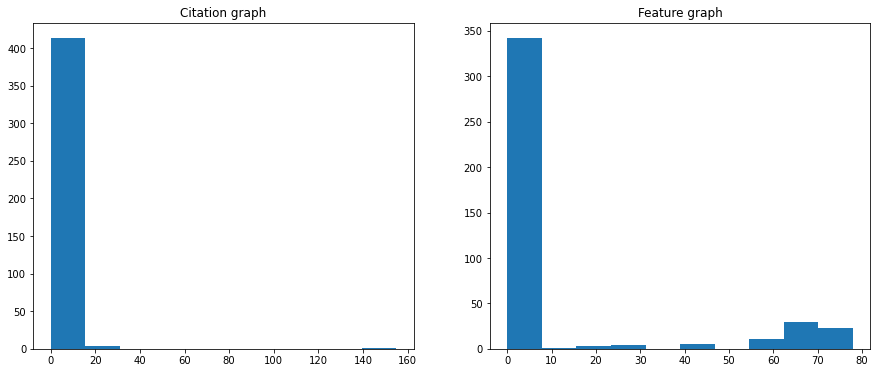

In [14]:
# Your solution here ###########################################################
citation_degrees = [G_citation.degree(node) for node in G_citation.nodes()]
feature_degrees = [G_feature.degree(node) for node in G_feature.nodes()]
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title('Citation graph')
axes[0].hist(citation_degrees);
axes[1].set_title('Feature graph')
axes[1].hist(feature_degrees);

**6.2 [2pt]** Explain what the degree distribution tell us about a network. Then, discuss how to make a prediction on the network model type of the citation and the feature graph by looking at their degree distributions.

**Your answer here:** The distribution of degrees within a network provides us with critical information about the structure and characteristics of the network. It is a measure of how the nodes within the network are interconnected and provides an understanding of the distribution of the number of connections or degrees that each node has. In essence, the examination of the degree distribution can assist in identifying key patterns and features of the network, including whether it is small-world, random, or scale-free. Scale-free networks are characterized by power-law degree distributions, where a few nodes, known as hubs, have an extremely high degree, and the majority of nodes have a low degree. Because both histograms follow a power law, we can infer that both networks follow the scale-free model.

**6.3 [1pt]** Simulate a network using the configuration model to match the degree distribution of the feature exactly. Refer to [Configuration model](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html#networkx.generators.degree_seq.configuration_model).


In [15]:
# Your solution here ###########################################################
G_config = nx.Graph(nx.configuration_model(feature_degrees))
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print('Configuration model has {} nodes and {} edges.'.format(G_config.number_of_nodes(), G_config.size()))
print('Feature model has {} nodes and {} edges.'.format(G_feature.number_of_nodes(), G_feature.size()))

Configuration model has 418 nodes and 1591 edges.
Feature model has 418 nodes and 2364 edges.


**6.4 [2pt]** Explain if the graph generated by the configuration model is identical to the feature graph. If not, motivate how to understand if they are not the same.

In both case, verify your answer with a code.

**Your answer here:** 

The graph that is produced by the configuration model may not be exactly the same as the feature graph. The configuration model only guarantees that the produced graph has the same degree sequence as the feature graph, but the specific edges and their connections may vary between the two graphs. In order to determine if the two graphs are identical, we must compare their attributes, such as the number of nodes, number of edges, degree sequence, and graph isomorphism.

Graph isomorphism is a property that determines whether two graphs have the same structure. If two graphs are isomorphic, it means that their nodes and edges can be mapped onto each other while preserving adjacency. However, in this case, it should be noted that the configuration model creates a graph with fewer edges than the feature graph, which makes it impossible for the two graphs to be isomorphic.


In [16]:
# Your solution here ###########################################################
# check if two graphs are isomorphic
if nx.is_isomorphic(G_config, G_feature):
    print('The graphs are isomorphic')
else:
    print('The graphs are not isomorphic')
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

The graphs are not isomorphic


**6.5 [2pt]** Which alternative model would you choose to match the degree distribution of the original network while mainitaining some structural similarities? 

**Your answer here:**

When attempting to match the distribution of degrees in the initial network while retaining structural similarities, the Chung-Lu model (also identified as the anticipated degree graph model) is a commendable alternative. This model produces a stochastic graph with a given degree sequence, similar to the configuration model. Nevertheless, the Chung-Lu model also preserves certain structural characteristics, such as clustering and degree correlations. 

The Chung-Lu model constructs a graph by allotting an anticipated degree to each node and then generating links between nodes with a likelihood proportional to the product of their anticipated degrees. This approach ensures that the graph created has a degree distribution comparable to the original network while maintaining some structural properties.

### Question 7 [11pt]: Clustering Coefficient and Watts-Strogatz model

Let us check the average clustering coefficient of the original citation and feature graphs. 

In [17]:
CC_cit = nx.average_clustering(G_citation)
CC_feat = nx.average_clustering(G_feature)
print("Clustering coefficient of citation graph:", CC_cit)
print("Clustering coefficient of feature graph:", CC_feat)

Clustering coefficient of citation graph: 0.31318396750074196
Clustering coefficient of feature graph: 0.17909022944594014


Let's compare it with the ER random netwrok model:

In [18]:
print("Clustering coefficient of ER graph", nx.average_clustering(G_er))

Clustering coefficient of ER graph 0.02013371202084963


**7.1 [2pt]** Explain what the clustering coefficient tell us about a network. Comment on how it compares to the random model.

**Your answer here:** 

The clustering coefficient is a network metric that assesses the extent to which nodes in the network tend to congregate with each other. It offers insight into the local structure of the network and the probability that a node's neighbors are also linked to each other. A high clustering coefficient indicates that nodes are more likely to form closely-knit groups with a higher density of links between neighbors, while a low clustering coefficient suggests a more sparse network with less interlinked neighbors.

Real-world networks generally display higher clustering coefficients in comparison to random models, such as the Erdős-Rényi (ER) random graphs. ER random graphs usually have low clustering coefficients due to their generation by connecting node pairs using uniform probabilities, resulting in a more haphazard distribution of edges and less propensity for nodes to cluster. In contrast, the various factors that promote the formation of interconnected groups or communities within the network lead to a higher degree of clustering in many real-world networks.

**7.2 [2pt]** In order to model the relatively high cluster coefficient of the **citation** graph while still maintaining the "small world" feature you will now create a Watts-Strogatz (WS) graph to fit the citation graph. First, set the regularity parameter $k$ Explain your choice.

**Your answer here:**

The regularity parameter, represented by $k$, in the Watts-Strogatz model is an integer value that determines the initial number of neighbors connected to each node in the regular lattice graph. A suitable choice for $k$ should balance two objectives: 

(1) preserving the high clustering coefficient of the citation graph 
(2) maintaining the small-world property with short average path lengths.

A common method for determining the value of $k$ is to set it equal to the average degree of the citation graph, as this value serves as a reasonable starting point for preserving the original network's connectivity properties.

In [19]:
# Your solution here ###########################################################
# set k_cit to the average degree of the citation graph
k_cit = np.round(np.mean(citation_degrees))
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**7.3 [3pt]** In order to select the optimal randomness parameter $p$ of the WS model we should monitor the clustering coefficient (CC) of the model with respect to $p$. Explain what other property should be monitored. Write a code that create WS networks with values of $p$ from $0$ to $1$ and plot the values of the CC and the other parameter with respect to p.

*Note*: plot the x axis in decimal and logarithmic scale and scale the values of the properties by the value at $p=0$. Make sure to select enough points for $p$ in thr range $[0,1]$

**Your answer here:**

In order to select the optimal randomness parameter $p$ of the WS model, we should monitor the clustering coefficient (CC) of the model with respect to $p$. Another important property to monitor is the average shortest path length (ASPL). This is because the small-world property is characterized by both a high clustering coefficient and short average path lengths.

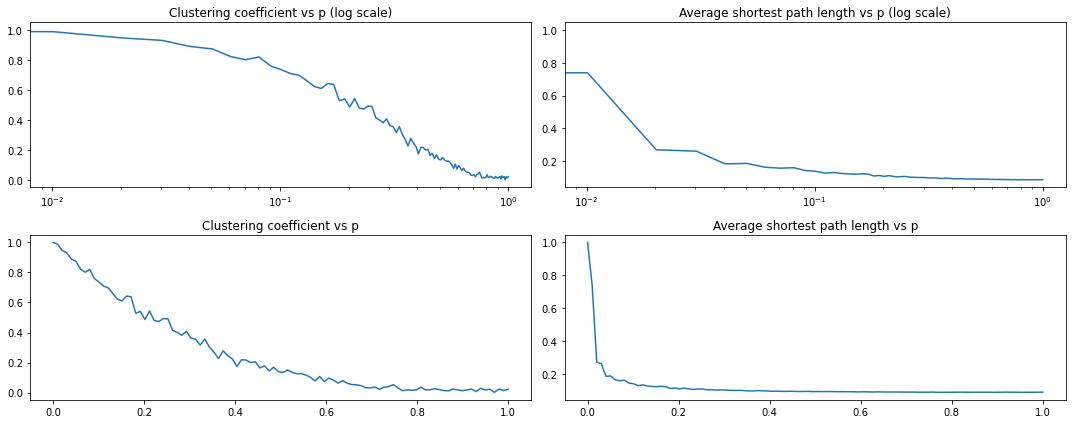

In [20]:
# Your solution here ###########################################################
# prepare the list of values for p
n_cit = G_citation.number_of_nodes()
p_list = np.linspace(0, 1, 100)
# create an empty list to store the clustering coefficients
CC_list = []
ASPL_list = []
# iterate over p values
for p in p_list:
    # create a new WS network
    G_WS = nx.watts_strogatz_graph(int(n_cit), int(k_cit), p)
    # calculate the clustering coefficient
    CC = nx.average_clustering(G_WS)
    # calculate the average shortest path length
    ASPL = nx.average_shortest_path_length(G_WS)
    # append the clustering coefficient and the average shortest path length to the lists
    CC_list.append(CC)
    ASPL_list.append(ASPL)

# Normalize the values by their respective values at p=0
clustering_coeffs = np.array(CC_list) / CC_list[0]
avg_shortest_path_lengths = np.array(ASPL_list) / ASPL_list[0]
# plot the results (log scale at the x-axis)
fig, axes = plt.subplots(2, 2, figsize=(15, 6))
axes[0, 0].set_title('Clustering coefficient vs p (log scale)')
axes[0, 0].plot(p_list, clustering_coeffs)
axes[0, 0].set_xscale('log')
axes[0, 1].set_title('Average shortest path length vs p (log scale)')
axes[0, 1].plot(p_list, avg_shortest_path_lengths)
axes[0, 1].set_xscale('log')
axes[1, 0].set_title('Clustering coefficient vs p')
axes[1, 0].plot(p_list, clustering_coeffs)
axes[1, 1].set_title('Average shortest path length vs p')
axes[1, 1].plot(p_list, avg_shortest_path_lengths)
plt.tight_layout()
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**7.4 [3pt]** Compute the values of the monitored properties of the real citation graph and scale them by the corresponding values of the WS models at $p=0$. Which $p$ whould you select? Explain and generate the model with the chosen parameters. 

*Hint*: Notice the connected components of citation graph for the computaion of the other property. 

In [21]:
# Your solution here ###########################################################
# Calculate the properties of the real citation graph
ASPL_cit = nx.average_shortest_path_length(giant_citation)
# Scale the properties by the corresponding values of the WS models at p=0
CC_scaled = CC_cit / CC_list[0]
ASPL_scaled = ASPL_cit / ASPL_list[0]
# Find the p value that corresponds to the real citation graph
diff = np.abs(clustering_coeffs - CC_scaled) + np.abs(avg_shortest_path_lengths - ASPL_scaled)
p_opt = p_list[np.argmin(diff)]
print('Optimal p:', np.round(p_opt, 2))
# Create the optimized WS graph
G_ws = nx.watts_strogatz_graph(n, int(k_cit), p_opt)
# Calculate the properties of the optimized WS graph
print('The optimized WS graph has {} nodes and {} edges.'.format(G_ws.number_of_nodes(), G_ws.size()))
print ('The clustering coefficient of the optimized WS graph is {}.'.format(nx.average_clustering(G_ws)))
print ('The average shortest path length of the optimized WS graph is {}.'.format(nx.average_shortest_path_length(G_ws)))
print ( 'The clustering coefficient of the citation graph is {}.'.format(CC_cit))
print ( 'The average shortest path length of the citation graph is {}.'.format(ASPL_cit))
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Optimal p: 0.14
The optimized WS graph has 418 nodes and 836 edges.
The clustering coefficient of the optimized WS graph is 0.3102301207564363.
The average shortest path length of the optimized WS graph is 6.50309226303168.
The clustering coefficient of the citation graph is 0.31318396750074196.
The average shortest path length of the citation graph is 3.556178114759365.


**Your answer here:**

To determine an appropriate value for $p$, we can compare the normalized clustering coefficient and average shortest path length of the actual citation graph with the corresponding values obtained from the Watts-Strogatz models. The objective is to identify a $p$ value that produces a Watts-Strogatz model with characteristics that closely match those of the actual citation graph.

**7.5 [1pt]** Explain whether the Watts-Strogatz model provides a good fit for the feature graph.

*Hint*: Remember that the feature graph in this section is a pruned version. 

**Your answer here:**

since the clustering coefficient and average shortest path length of the Watts-Strogatz model are similar to those of the citation graph, it can be considered a reasonably good match. However, it is important to note that the Watts-Strogatz model may not fully capture some of the more intricate structural properties of the target graph, such as community structure, degree correlations, or particular connectivity patterns.For a more precise representation of the target graph's structure, other graph models that take into account additional properties may be necessary.

### Question 8 [8pt]: Comparison to Barabási-Albert (BA) model

**8.1 [2pt]** Explain how to determine the preferential attachment parameter for Barabási–Albert graphs. Define $q$ and build the BA graph. 

**Your answer here:** 

To determine the preferential attachment parameter for Barabási–Albert (BA) graphs, we should compute the average degree of the network, divide it by 2, and round it to the closest integer value. The preferential attachment parameter, denoted as $q$, signifies the number of edges that each new node generates with existing nodes in the network upon being added.

In [22]:
# Your solution here ###########################################################
# compute the average degree of the citation graph
q = int(np.round(k_cit / 2))
print(q)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
G_ba = nx.barabasi_albert_graph(n, q)

2


Check the number of edges in the Barabási–Albert graph.

In [23]:
print('My Barabási-Albert network that simulates the citation graph has {} edges.'.format(G_ba.size()))

My Barabási-Albert network that simulates the citation graph has 832 edges.


**8.2 [2pt]** Plot the degree distribution histograms for the simulated networks (ER, BA, Configuration, WS).

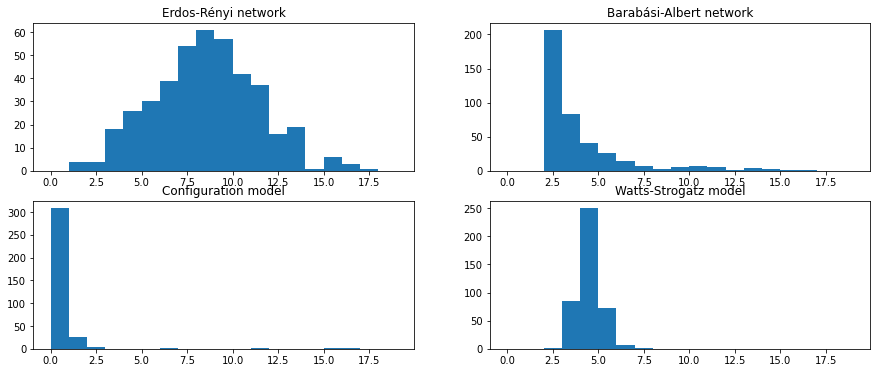

In [24]:
# Your solution here ###########################################################
er_degrees = [nx.degree(G_er, node) for node in G_er.nodes()]
ba_degrees = [nx.degree(G_ba, node) for node in G_ba.nodes()]
config_degrees = [nx.degree(G_config, node) for node in G_config.nodes()]
ws_degrees = [nx.degree(G_ws, node) for node in G_ws.nodes()]
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

fig, axes = plt.subplots(2, 2, figsize=(15, 6))

bins = np.arange(20)
axes[0,0].set_title('Erdos-Rényi network')
axes[0,0].hist(er_degrees, bins=bins)
axes[0,1].set_title('Barabási-Albert network')
axes[0,1].hist(ba_degrees, bins=bins)
axes[1,0].set_title('Configuration model')
axes[1,0].hist(config_degrees, bins=bins)
axes[1,1].set_title('Watts-Strogatz model')
axes[1,1].hist(ws_degrees, bins=bins)
plt.show()

**8.3 [2pt]** Explain, in terms of the degree distribution, whether there is a good match between the citation and feature graphs and the simulated networks.
For the citation graph, choose one of the simulated networks above that match its degree distribution best and indicate your preference below.

**Your answer here:**

The degree distributions of the networks can be characterized as follows:

Erdős-Rényi (ER) network: Normal (Poissonian) degree distribution
Barabási-Albert (BA) network: Power-law degree distribution (starting from 4, not from 0)
Configuration model: Power-law degree distribution
Watts-Strogatz (WS) model: Normal degree distribution with small standard deviation
Both the feature graph and the citation graph exhibit a power-law degree distribution. Based on the degree distributions, the BA network and the configuration model are more suitable matches for the citation and feature graphs than the ER and WS networks.

Out of the two power-law degree distribution networks (BA and configuration model), the configuration model provides a closer match to the real-world networks because it can replicate the exact degree distribution of the original networks. On the other hand, the BA network only approximates the power-law distribution with a preferential attachment parameter.

Therefore, the configuration model is the preferred choice for matching the degree distribution of the graphs.

Now, let us check the average clustering coefficient for the simulated networks.

In [25]:
print("Erdos-Renyi clustering coefficient:", nx.average_clustering(G_er))
print("Barabasi-Albert clustering coefficient:", nx.average_clustering(G_ba))
print("Configuration model clustering coefficient:", nx.average_clustering(nx.Graph(G_config)))
print("Watts-Strogatz model clustering coefficient:", nx.average_clustering(G_ws))

Erdos-Renyi clustering coefficient: 0.02013371202084963
Barabasi-Albert clustering coefficient: 0.038604820746797934
Configuration model clustering coefficient: 0.1057378110403241
Watts-Strogatz model clustering coefficient: 0.3102301207564363


In [26]:
print ("citation graph clustering coefficient:", CC_cit)
print ("feature graph clustering coefficient:", CC_feat)

citation graph clustering coefficient: 0.31318396750074196
feature graph clustering coefficient: 0.17909022944594014


**8.4 [2pt]** Comment on the values you obtain for the simulated networks. Motivate if there is any good match to the citation or feature graph in terms of clustering coefficient.

**Your answer here:**

Upon comparing the clustering coefficients of the simulated networks with those of the citation and feature graphs, we note that the Watts-Strogatz (WS) model is the only one that has a clustering coefficient that is very close to the citation graph's, indicating that it might be a good match for clustering coefficient. However, it is important to note that the WS model has a normal degree distribution, which is not a good fit for the power-law degree distribution observed in the citation and feature graphs.

### Question 9 [13pt]: Network generating process

In this question we will design a network formation model for the directed citation graph, considering it as a growth process.

**9.1 [3pt]** Supposing that authors know all papers in their field at any time, how can we model their choice to cite each of them?

**Your answer here:**

We can use the Preferential Attachment mechanism to model the authors' choice to cite papers in their field. This mechanism assumes that authors are more likely to cite papers that are already highly cited because these papers are considered more influential or represent significant advancements in the field. Accordingly, the probability of citing a paper is proportional to its in-degree, which refers to the number of citations it has already received.

To generate a new paper node in the network, we can assign its outgoing edges (i.e., citations) to existing paper nodes with a probability proportional to their current in-degree. We can as well introduce some randomness to our network generation to model the noise in real world networks. This process is  a common mechanism used to model the growth of networks with power-law degree distributions.


**9.2 [5pt]** Define a function that takes as input the number of nodes $n$ and any other parameter you identified. This function iteratively grows a graph on $n$ nodes based on the formation model that you described in 9.1. You can add all additional arguments that you need.

In [27]:
# print the average degree of the citation graph
print('The average degree of the citation graph is {}.'.format(k_cit))

The average degree of the citation graph is 4.0.


In [138]:
# Your solution here ###########################################################
def my_formation_model(n_nodes: int, m: int, p: float):
    # Initialize the graph with two connected nodes
    G = nx.DiGraph()
    G.add_edge(0, 1)

    for i in range(2, n_nodes):
        # Calculate the total in-degree in the network
        total_in_degree = sum(dict(G.in_degree()).values())

        # Calculate the probability for each existing node to be cited
        preferential_probs = np.array([d / total_in_degree for _, d in G.in_degree()])

        # Introduce randomness in the citation process
        random_probs = np.random.uniform(0, 1, size=preferential_probs.shape)

        # Combine preferential attachment and random citation probabilities
        citation_probs = (1 - p) * preferential_probs + p * random_probs

        # citation probs should sum to 1
        citation_probs /= citation_probs.sum()

        # Select m nodes to cite based on the combined probabilities
        # the size of the cited nodes should be either m or lower than m with a probability of p
        size = m if np.random.uniform(0, 1) < p else np.random.randint(1, m + 1)
        cited_nodes = np.random.choice(np.arange(i), size=size, replace=False, p=citation_probs[:i])

        # Add the new node and connect it to the selected nodes, skip assignning citations with a probability of p / 2
        if np.random.uniform(0, 1) < (p / 2):
            G.add_node(i)
        else:
            for cited_node in cited_nodes:
                G.add_edge(i, cited_node)

    return nx.adjacency_matrix(G).toarray()


A_mymodel = my_formation_model(A_citation.shape[0], q, 0.2)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


**9.3 [1pt]** Check wether your graph is directed. If it is, make it undirected.

In [139]:
# Your solution here ###########################################################
# check wether the graph is directed
print('Is the graph directed?', nx.is_directed(nx.from_numpy_array(A_mymodel)))

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Is the graph directed? False


**9.4 [2pt]** Compare the degree distributions of the citation graph and yours, then tune the paramters of your model to have a similar distribution.

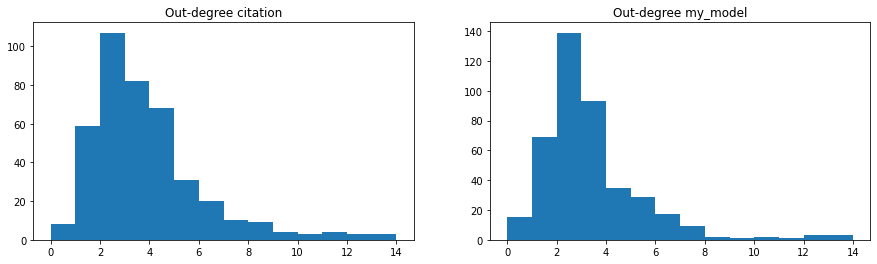

In [140]:
# Your solution here ###########################################################
degrees_citation = [nx.degree(G_citation, node) for node in G_citation.nodes()]
degrees_mymodel = [nx.degree(nx.from_numpy_array(A_mymodel), node) for node in nx.from_numpy_array(A_mymodel).nodes()]
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set(title="Out-degree citation")
ax[0].hist(degrees_citation, bins=np.arange(15))

ax[1].set(title="Out-degree my_model")
ax[1].hist(degrees_mymodel, bins=np.arange(15))

plt.show()

**9.5 [2pt]** Compute and print the following metrics:
- Number of edges
- Giant component size and number of edges
- Clustering coefficient

In [141]:
# Your solution here ###########################################################
# number of egdes in my model graph
print('The number of edges in my model graph is {}.'.format(A_mymodel.sum() / 2))
# giant component size and nubmer of edges in giant component
print('The giant component size is {}.'.format(max([len(c) for c in sorted(nx.connected_components(nx.from_numpy_array(A_mymodel)), key=len, reverse=True)])))
print('The number of edges in the giant component is {}.'.format(nx.number_of_edges(nx.from_numpy_array(A_mymodel).subgraph(max(nx.connected_components(nx.from_numpy_array(A_mymodel)), key=len)))))
# clustering coefficient of my model graph
print('The clustering coefficient of my model graph is {}.'.format(nx.average_clustering(nx.from_numpy_array(A_mymodel))))

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


The number of edges in my model graph is 302.5.
The giant component size is 398.
The number of edges in the giant component is 602.
The clustering coefficient of my model graph is 0.003966780162952412.


### Question 10 [4pt]: Putting it all together

It is time to identify the best models for our graphs.

**10.1 [4pt]** Compare the metrics computed across all models and discuss which models provide the best fit to our two graphs and which are their shortcomings. Note that the best model could be different for the citation and feture graphs.

**Your answer here:**